Challenges of the day:

- Plot a bar graph to show the rating distribution. Means that, a bar chart shows how many business are rated as 1 star, 1.5 stars and so on

- Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories

- Plot a bar chart to show top 20 cities that have the most number businesses

- Select 1 city of your choice, then:

-filter out all businesses in that city

-find the 5 most popular business categories.

-plot a bar chart to show the amount of checkins by hours of each business in the top 5 above ( meaning, x-axis is the hours, and y-axis is the amount of checkins)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
business = pd.read_csv('yelp_business.csv')
b_attributes = pd.read_csv ('yelp_business_attributes.csv')
hours = pd.read_csv ('yelp_business_hours.csv')
checkin = pd.read_csv ('yelp_checkin.csv')
tip = pd.read_csv ('yelp_tip.csv')

In [3]:
business.head(2)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [4]:
business.stars.unique()

array([4. , 3. , 1.5, 3.5, 5. , 4.5, 2. , 2.5, 1. ])

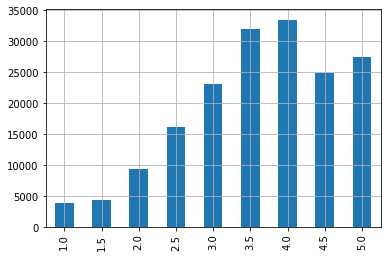

In [5]:
business.stars.value_counts().sort_index(ascending = True).plot ('bar', grid='-')

Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories

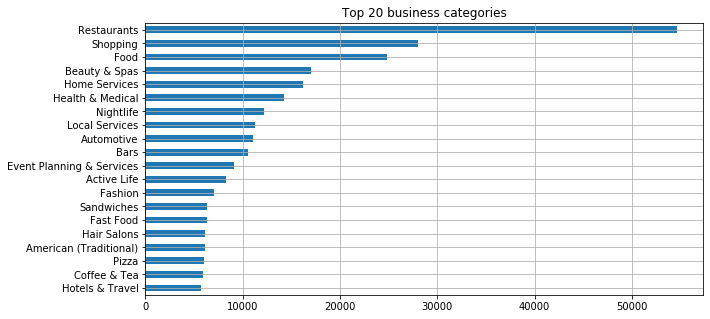

In [15]:
# solution 1
b_categories_df = pd.DataFrame(business.categories.str.split(';').tolist(), index=business.business_id).stack()
#b_categories_df.head(20)
b_categories_df = b_categories_df.reset_index([0, 'business_id'])
#b_categories_df[b_categories_df['business_id'] == 'FYWN1wneV18bWNgQjJ2GNg']
#b_categories_df.head(20)
b_categories_df.columns=['business_id','categories']
b_categories_df.categories.value_counts().head(20).sort_values(ascending=True).plot(kind='barh', figsize =(10,5), grid ='-',title = 'Top 20 business categories')
plt.show()

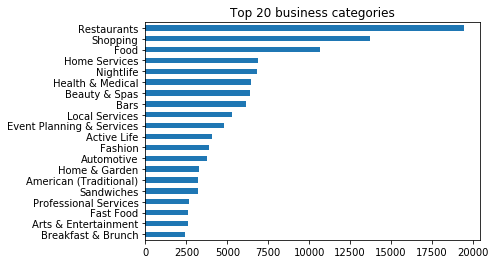

"Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas Departments of"

In [83]:
# solution 2
newlist=business["categories"].tolist()
b = " ".join(str(x) for x in newlist)
c= b.split(';')
c[:]
categ_df= pd.DataFrame(c[:])
categ_df.head(5)
categ_df.columns = ['categories']
categ_df.categories.value_counts().head(20).sort_values(ascending =True).plot(kind='barh', title = 'Top 20 business categories')
plt.show()
b[:200]

Plot a bar chart to show top 20 cities that have the most number businesses

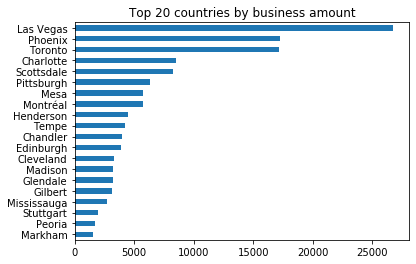

In [84]:
business.city.value_counts().head(20).sort_values(ascending =True).plot(kind='barh', title = 'Top 20 countries by business amount')

Select 1 city of your choice, then:

-filter out all businesses in that city

-find the 5 most popular business categories.

-plot a bar chart to show the amount of checkins by hours of each business in the top 5 above ( meaning, x-axis is the hours, and y-axis is the amount of checkins)

In [85]:
#checkin.
#hours.
#b_categories_df
Las_vegas = business[business["city"]=='Las Vegas'][['business_id','name','city']]

['Food', 'Beauty & Spas', 'Home Services', 'Shopping', 'Restaurants']

In [115]:
top_checkin_df = pd.DataFrame(LV_b_chekin.groupby('name')['checkins'].sum().sort_values(ascending=False).head(5).sort_values(ascending=True))
#top_checkin_df = top_checkin_df.reset_index([0,'name'])
#top_checkin_list = list(top_checkin_df['name'])
#top_checkin_list
top_checkin_df.head(2)

,checkins
name,
"""The Cosmopolitan of Las Vegas""",219975
"""Las Vegas Athletic Club""",229203


In [88]:
#time = pd.to_datetime(df.time, format='%H:%M:%S').dt.time[0]
LV_b_chekin.hour=pd.to_datetime(LV_b_chekin.hour, format = '%H:%M').dt.hour


In [89]:
LV_b_chekin.head(3)


,business_id,name,city,categories,weekday,hour,checkins
0,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Las Vegas,Shopping,Wed,22,2
1,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Las Vegas,Shopping,Sun,0,1
2,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Las Vegas,Shopping,Sun,21,1


In [90]:
def top_check(list=top_checkin_list):
    for i in list:
        a = LV_b_chekin[LV_b_chekin['name']==i].groupby('hour')["checkins"].sum()
        a.plot(kind = 'bar',figsize=(10,5),title = f"Check Ins by time of {i}")
        print (plt.show())
#checkin_by_cntr[checkin_by_cntr['name']=='"Las Vegas Athletic Club"'].groupby('hour')["checkins"].sum().plot.bar(figsize=(10,5))

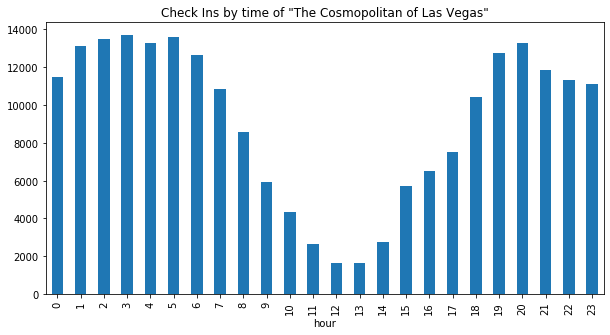

None


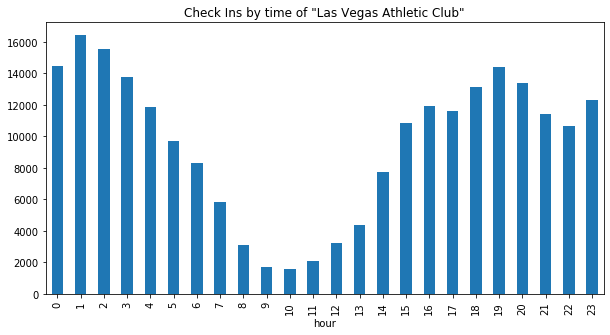

None


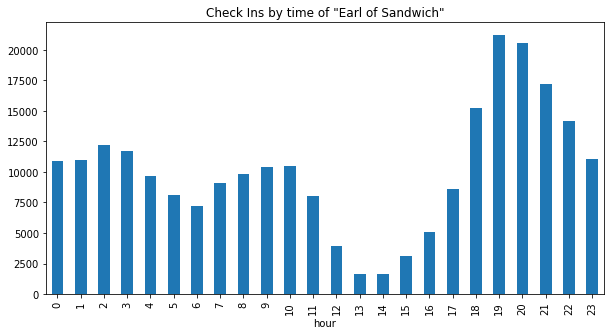

None


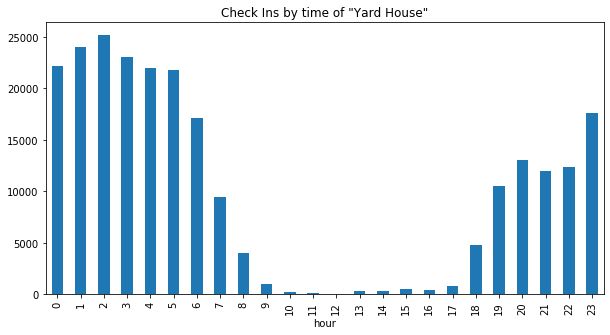

None


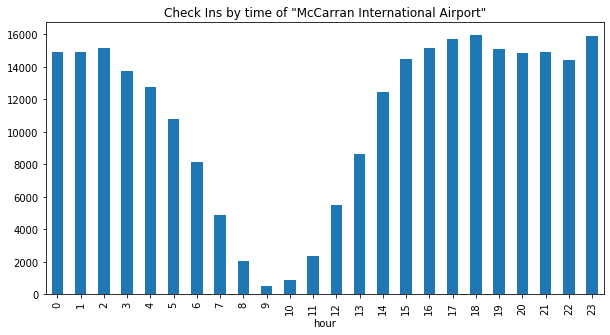

None


In [91]:
top_check()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

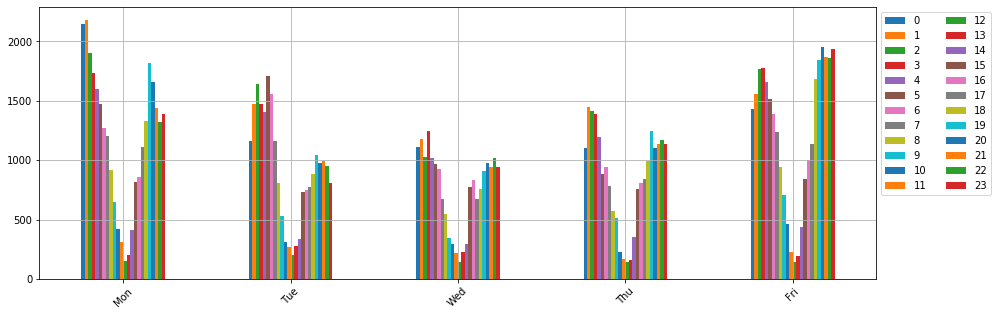

In [92]:
a1 = LV_b_chekin[(LV_b_chekin['name']=='"The Cosmopolitan of Las Vegas"')&
                 (LV_b_chekin['weekday']=="Mon")].groupby('hour')["checkins"].sum()
a2 = LV_b_chekin[(LV_b_chekin['name']=='"The Cosmopolitan of Las Vegas"')&
                 (LV_b_chekin['weekday']=="Tue")].groupby('hour')["checkins"].sum()
a3 = LV_b_chekin[(LV_b_chekin['name']=='"The Cosmopolitan of Las Vegas"')&
                 (LV_b_chekin['weekday']=="Wed")].groupby('hour')["checkins"].sum()
a4 = LV_b_chekin[(LV_b_chekin['name']=='"The Cosmopolitan of Las Vegas"')&
                 (LV_b_chekin['weekday']=="Thu")].groupby('hour')["checkins"].sum()
a5 = LV_b_chekin[(LV_b_chekin['name']=='"The Cosmopolitan of Las Vegas"')&
                 (LV_b_chekin['weekday']=="Fri")].groupby('hour')["checkins"].sum()
compare_df = pd.DataFrame([a1,a2,a3,a4,a5])
compare_df.index = ['Mon','Tue','Wed', 'Thu', 'Fri']
compare_df.plot.bar(figsize =(15,5), grid='-')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.xticks(rotation = 45)

In [128]:
Las_vegas_categories = pd.merge(Las_vegas,b_categories_df)
LV_b_chekin = pd.merge(Las_vegas_categories,checkin)
top_5_cat_in_vegas = pd.DataFrame(Las_vegas_categories.categories.value_counts().head(5).sort_values(ascending=True))
#top_5_cat_in_vegas.plot(kind="barh")
top_5_cat_in_vegas.head(2)
testlist = list(top_5_cat_in_vegas.index)
testlist

['Food', 'Beauty & Spas', 'Home Services', 'Shopping', 'Restaurants']

In [136]:
for i in testlist:
    df_with_top_5_cat = LV_b_chekin[LV_b_chekin['categories']==i]
    return df_with_top_5_cat

175217
76424
26022
138543
376413
